In [1]:
#SUV PREDICTIONS
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math



In [2]:
suv = pd.read_csv("suv_data.csv")
print(suv.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [4]:
print("No. of Customers : ",len(suv))

No. of Customers :  400


<Axes: xlabel='Gender', ylabel='count'>

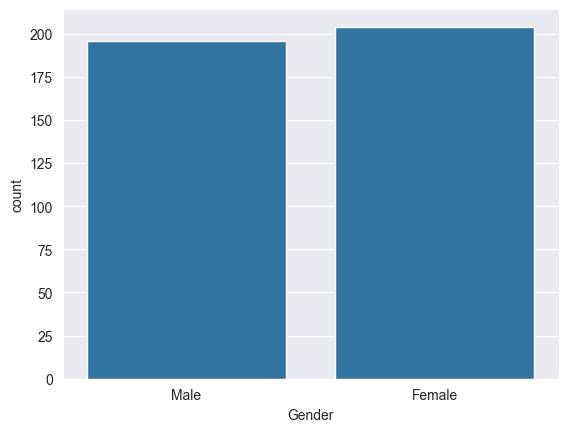

In [5]:
sns.countplot(x="Gender",data=suv)

<Axes: xlabel='Gender', ylabel='count'>

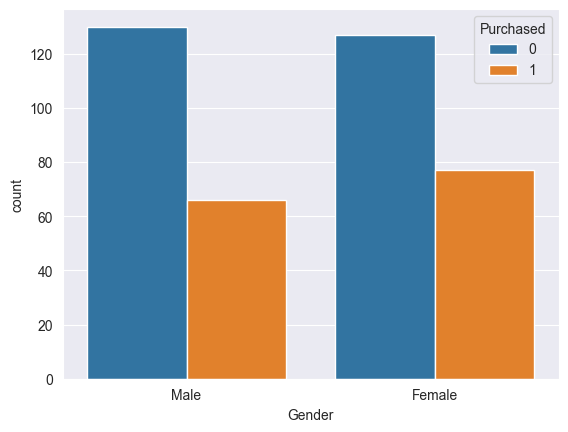

In [11]:
sns.countplot(x="Gender",hue="Purchased" ,data =suv)

<Axes: ylabel='Frequency'>

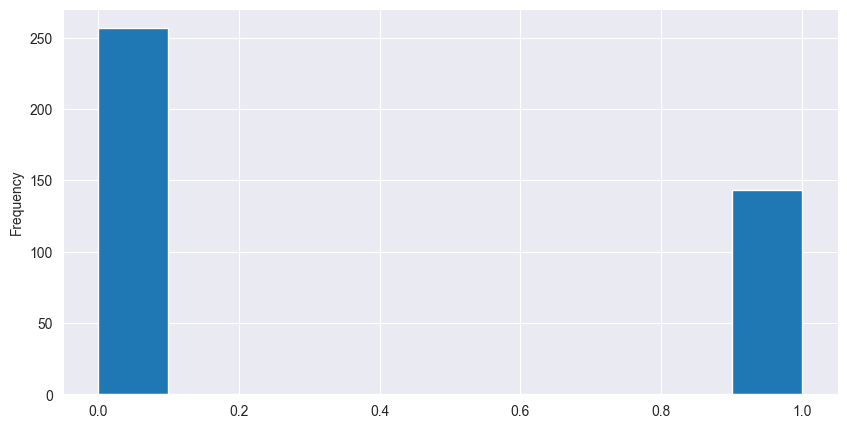

In [13]:
suv["Purchased"].plot.hist(figsize = (10,5))

In [15]:
suv.isnull().sum()
#no null values

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<Axes: xlabel='Gender', ylabel='Age'>

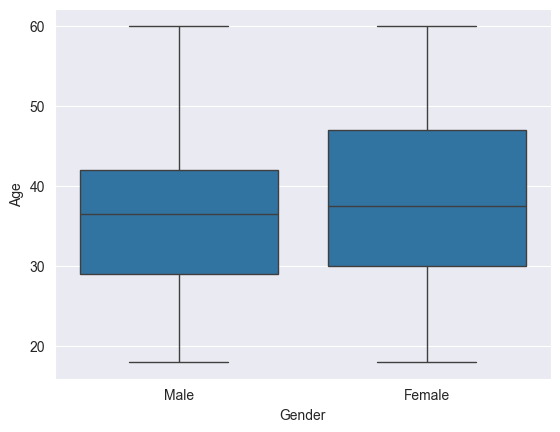

In [20]:
sns.boxplot(x="Gender", y="Age", data=suv)

In [21]:
suv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [24]:
X= suv.iloc[:,[2,3]].values #independent variable
y =suv.iloc[:,4].values   # dependent variable
#iloc = indexing

In [25]:
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [27]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
from sklearn.preprocessing import StandardScaler

In [32]:
sc = StandardScaler()# object which will standardize features by removing the mean and scaling to unit variance.
X_train = sc.fit_transform(X_train)#first calculates the mean and standard deviation of each feature from X_train (this is the fit part),
X_test = sc.transform(X_test)#using the same mean and standard deviation learned from X_train

In [35]:
from sklearn.linear_model import LinearRegression
classifier = LinearRegression()
classifier.fit(X_train,y_train)

LinearRegression()

In [36]:
y_pred = classifier.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score
y_pred_class = (y_pred > 0.5).astype(int)  # for binary classification
accuracy_score(y_test, y_pred_class)*100

89.0

In [40]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
# the predictions are fairly close to the true values, as 0.0987 is relatively low (depending on your target value scale).

MSE: 0.09872045740502204


In [43]:
from sklearn.metrics import confusion_matrix
y_pred_class = (y_pred > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred_class)
print(cm)

[[65  3]
 [ 8 24]]
